### Problem definition:
#### Predict online payment fraud using a machine learning model

### Business benefit: 
#### Reducing fraud losses and increasing customer trust

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data = pd.read_csv(r'C:\Users\vitus.agwulonu\Documents\PERSONAL DOC\Lecture\Capstone Project\Online Payment Fraud Detection.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [3]:
data.info(),

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


(None,)

In [4]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00


### 2. Exploratory Data Analysis (EDA)

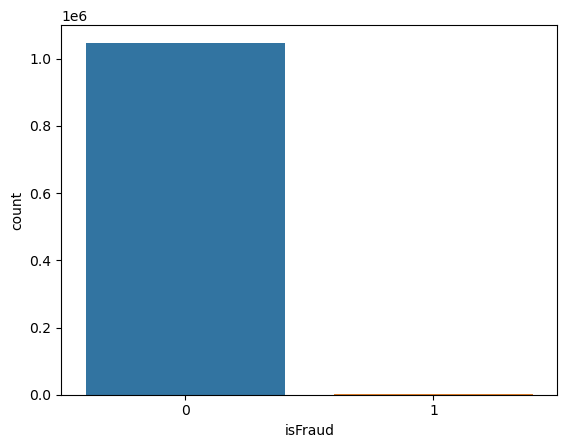

In [5]:
# 2a. Visualize relationships between the label and some key features
sns.countplot(x='isFraud', data=data)
plt.show()

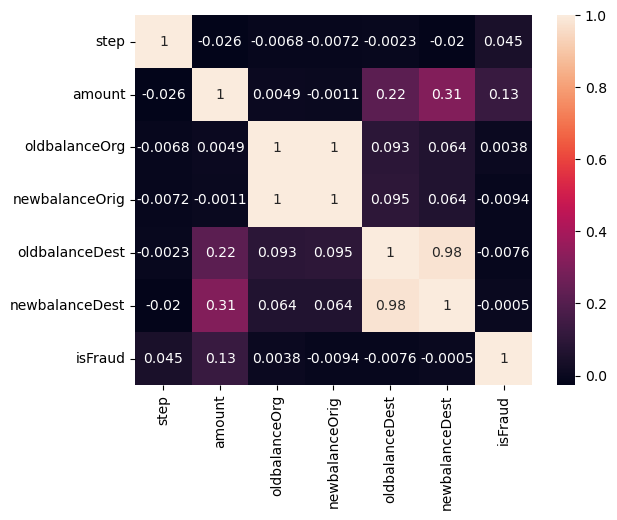

In [6]:
# 2b. Explore correlations
corr = data.corr()
sns.heatmap(corr, annot=True)
plt.show()

### 2c. Conduct univariate and multivariate analysis
#### Univariate analysis


In [7]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


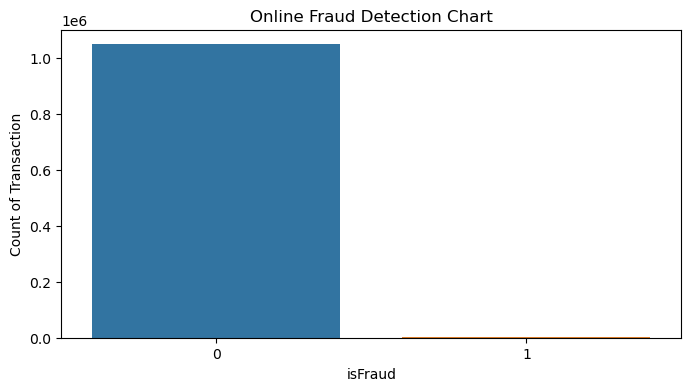

In [8]:
# Create a visual(chart) that shows the distribution of 'Fraud' and 'No Fraud'

plt.figure(figsize=(8,4))
plt.title('Online Fraud Detection Chart')
sns.countplot(data=data, x='isFraud')
plt.xlabel('isFraud')
plt.ylabel('Count of Transaction')
plt.show()

In [9]:
# Univariete analysis of " Fraud" and " No Fraud" transactions

data['isFraud'].value_counts()

0    1047433
1       1142
Name: isFraud, dtype: int64

In [10]:
# What's the rate of Fraudulent Transaction?
# What percentage of Fraud transactions vs No Fraud Transactions 

survival_percentage = (data['isFraud'].value_counts()/data.shape[0]*100).round(2)
survival_percentage

0    99.89
1     0.11
Name: isFraud, dtype: float64

#### 2c. Multivariete Analysis

In [11]:
#separated target from dataset
#target = ["isFraud"]
data = data.drop(columns=["nameOrig", "nameDest"], axis=1)

In [12]:
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


<AxesSubplot:xlabel='type', ylabel='amount'>

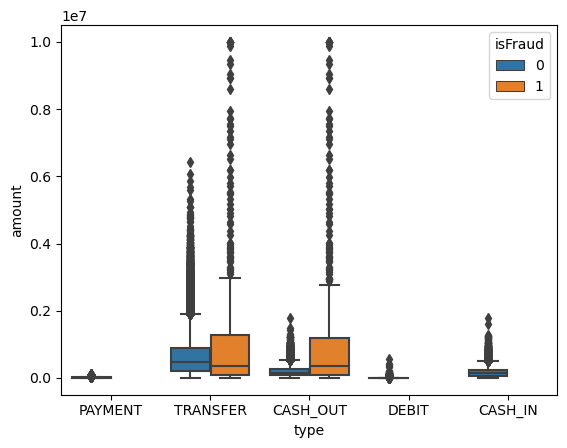

In [13]:
sns.boxplot(x='type', y='amount', hue='isFraud', data=data)

In [14]:
#sns.pairplot(data)

### 3. Feature Engineering
#### 3a. Encoding categorical variables

In [15]:
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [16]:
#separated target from dataset
y = data["isFraud"]
X = data.drop("isFraud", axis=1)

In [17]:
# Encoding categorical variables

X = pd.get_dummies(X)
X

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,0,1,0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0,1,0
2,1,181.00,181.00,0.00,0.00,0.00,0,0,0,0,1
3,1,181.00,181.00,0.00,21182.00,0.00,0,1,0,0,0
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,132557.35,479803.00,347245.65,484329.37,616886.72,0,1,0,0,0
1048571,95,9917.36,90545.00,80627.64,0.00,0.00,0,0,0,1,0
1048572,95,14140.05,20545.00,6404.95,0.00,0.00,0,0,0,1,0
1048573,95,10020.05,90605.00,80584.95,0.00,0.00,0,0,0,1,0


In [18]:
X

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,0,1,0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0,1,0
2,1,181.00,181.00,0.00,0.00,0.00,0,0,0,0,1
3,1,181.00,181.00,0.00,21182.00,0.00,0,1,0,0,0
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,132557.35,479803.00,347245.65,484329.37,616886.72,0,1,0,0,0
1048571,95,9917.36,90545.00,80627.64,0.00,0.00,0,0,0,1,0
1048572,95,14140.05,20545.00,6404.95,0.00,0.00,0,0,0,1,0
1048573,95,10020.05,90605.00,80584.95,0.00,0.00,0,0,0,1,0


In [19]:
y

0          0
1          0
2          1
3          1
4          0
          ..
1048570    0
1048571    0
1048572    0
1048573    0
1048574    0
Name: isFraud, Length: 1048575, dtype: int64

### 4. Model selection, training, and validation

In [20]:
# Split the data into training and testing sets

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(838860, 11)
(209715, 11)
(838860,)
(209715,)


#### 4.a Train and test at least 2 supervised learning models

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [23]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)

In [24]:
print(log_reg_pred[:5])

[0 0 0 0 0]


In [25]:
# Decision Tree
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
dt_clf_pred = dt_clf.predict(X_test)

In [26]:
print(dt_clf_pred[:5])

[0 0 0 0 0]


In [27]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

C:\Users\vitus.agwulonu\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [28]:
print(knn_pred[:5])

[0 0 0 0 0]


In [29]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [30]:
from sklearn.metrics import classification_report

In [31]:
# Classification report for Logistic Regression
print(classification_report(y_test, log_reg_pred))
print()

# Classification report for Decision tree classifier
print(classification_report(y_test, dt_clf_pred))
print()

# Classification report for KNeighborsClassifier
print(classification_report(y_test, knn_pred))
print()

# Classification report for KNeighborsClassifier
print(classification_report(y_test, rf_pred))
print()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209494
           1       0.55      0.35      0.43       221

    accuracy                           1.00    209715
   macro avg       0.78      0.67      0.71    209715
weighted avg       1.00      1.00      1.00    209715


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209494
           1       0.74      0.81      0.77       221

    accuracy                           1.00    209715
   macro avg       0.87      0.90      0.89    209715
weighted avg       1.00      1.00      1.00    209715


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209494
           1       0.78      0.50      0.61       221

    accuracy                           1.00    209715
   macro avg       0.89      0.75      0.80    209715
weighted avg       1.00      1.00      1.00    209715


              pr

In [32]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, log_reg_pred))
print()
print()
print(confusion_matrix(y_test, dt_clf_pred))
print()
print()
print(confusion_matrix(y_test, knn_pred))
print()
print()
print(confusion_matrix(y_test, rf_pred))

[[209432     62]
 [   144     77]]


[[209432     62]
 [    42    179]]


[[209463     31]
 [   111    110]]


[[209488      6]
 [    46    175]]


### Model/Result Interpretation

#### The classification report presents the performance evaluation metrics of four different classification models: 
#### - Logistic Regression, Decision Tree Classifier, K-Nearest Neighbors (KNN) Classifier, and Random Forest Classifier (RF).

#### - Each report shows the precision, recall, and F1-score for each class, as well as the support and accuracy for the model.

#### - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations, 
#### -  while recall is the ratio of correctly predicted positive observations to the total actual positive observations. 
#### - F1-score is the harmonic mean of precision and recall.
#### - The support refers to the number of observations in each class, while the accuracy is the overall percentage of correctly classified observations.

#### Precision = TP/(TP+FP)
#### Recall = TP/(TP+FN)
#### F1 Score = 2*(Precision * Recall)/(Precision + Recall)
#### Accuracy = (TP+TN)/Total
#### Where; 
##### TN = True Negative, TP = True Positive, FN = False Negative, FP = False Positive

#### 5a. From my result, the Precision rate for Logistic Regression is 55% and its Recall rate is 35%, resulting in an F1-score of 43%. However, due to the relatively low Recall rate, Logistic Regression may not be as effective in detecting fraudulent transactions compared to other classification models.

#### The K-Nearest Neighbors (KNN) Classifier achieved a precision rate of 78% and a recall rate of 50%, resulting in an F1-score of 61%. However, its relatively low recall rate indicates that it may not be the best choice for detecting fraudulent transactions when compared to other classifiers.

#### The Random Forest Classifier (RF) is a reliable tool for identifying fraudulent transactions due to its impressive Recall rate of 79%. Nonetheless, the model's high Precision rate of 97% could potentially cause inconvenience for customers during their transactions.

#### Decision Tree Classifier - Based on the results, the Decision Tree Classifier appears to be the most effective out of the four classifiers that were utilized. This particular model achieved a high Recall rate of 81% for identifying fraudulent transactions, which was the primary objective of training and testing the models.


#### 5b. What Matrics are the most important:
##### The most important Matric is the Recal Matric as it is able to detect fraudulent transactions in the dataset. A higher recall indicates that the model has fewer false negatives, which means the model is better at identifying all the positive instances. Hence the business should be more concerned about the false negatives.